# Import

In [94]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Gather data

In [95]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [96]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [97]:
sample_data = pd.read_csv('dataset/sample_submission.csv')
sample_data.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


# distributions 

In [98]:
print(f'Train set:\t {round(train_data.shape[0]/(train_data.shape[0] + test_data.shape[0]), 1)*100}%')
print(f'Test set:\t {round(test_data.shape[0]/(train_data.shape[0] + test_data.shape[0]), 1)*100}%')

Train set:	 70.0%
Test set:	 30.0%


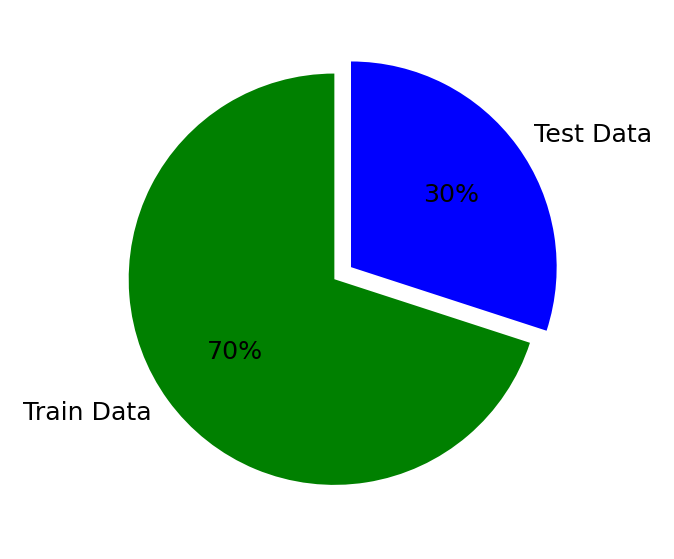

In [99]:

category_names = ['Train Data', 'Test Data']
sizes = [train_data.shape[0], test_data.shape[0]]
custom_colours = ['green', 'blue']

plt.figure(figsize=(3, 3), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.1])
plt.show()

# E-D-A: Explanatory Data Analysis
# Pie-Charts

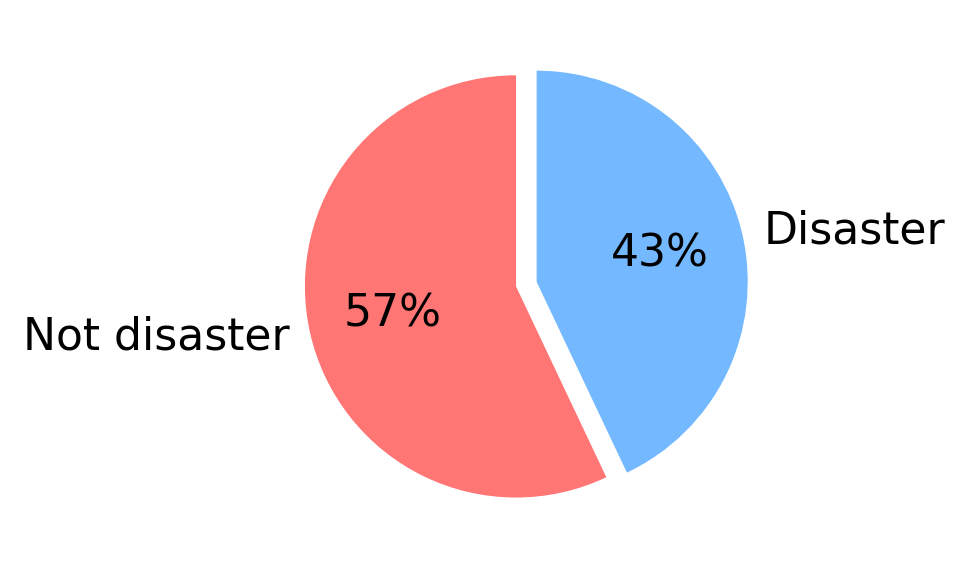

In [100]:
tots = train_data.target.value_counts()

category_names = ['Not disaster', 'Disaster']
sizes = [tots[0], tots[1]]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(3, 5), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 14}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.1])
plt.show()

## Barplot

Text(0, 0.5, 'proportions')

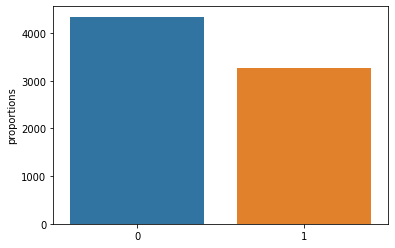

In [101]:
x=train_data.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('proportions')

In [102]:
tots

0    4342
1    3271
Name: target, dtype: int64

In [103]:
missing_values = train_data.isna().sum() / train_data.shape[0]

In [104]:
missing_values*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [105]:
train_data.sample(10)

,id,keyword,location,text,target
4198,5961,hazard,"Portsmouth, VA",Freak accident? Sure. Looking for someone to b...,0
1437,2073,casualty,Kenya,Benzema increasingly looks to be a casualty of...,1
5591,7978,razed,NaN,The Latest: More homes razed by Northern Calif...,1
3115,4471,electrocuted,Oblivion?,Just thought I'd let you all know...\nIt's pro...,0
1121,1617,bombed,"Screwston, TX",'Redskins WR Roberts Belly-Bombed ' via @TeamS...,1
5770,8237,riot,Tipperary (Long Way),Sweetpea's are running riot at the allotment -...,1
2546,3653,destroy,Johannesburg,Tell him Rebahe's going to destroy himself @Ze...,0
6459,9240,suicide%20bombing,NaN,1 of the major reason of suicide bombing is th...,1
6204,8854,smoke,NaN,@SidelineSavage what like a pipe made of peanu...,0
556,805,battle,USA,Black Eye 9: A space battle occurred at Star M...,1


## Dropping unused columns

In [106]:
train_data.drop('id', axis=1, inplace=True)

In [107]:
train_data.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## type of variables

In [108]:
train_data.dtypes

keyword     object
location    object
text        object
target       int64
dtype: object

## 10 most frequent keywords

In [109]:
train_data.keyword.value_counts()[:10]

fatalities     45
armageddon     42
deluge         42
body%20bags    41
damage         41
harm           41
sinking        41
fear           40
siren          40
windstorm      40
Name: keyword, dtype: int64

In [125]:
train_data.keyword = train_data.keyword.fillna('NaN')
train_data.location = train_data.location.fillna('NaN')

# Training model with Tf-Idf Vectorizer as Vectorizer

In [136]:
X_train = train_data['text']
tf_idf = TfidfVectorizer()
X_train_vect = tf_idf.fit_transform(X_train)

y_train = train_data['target']

In [137]:
X_train_vect.shape

(7613, 21637)

In [149]:
X_test = test_data['text']
X_test_vect = tf_idf.transform(X_test)

In [154]:
y_test = sample_data['target']

## Model Summary function 

In [ ]:
result_dic = {}
def sommaire_classification(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred, normalize=True)
    # conf_m = confusion_matrix(y_test, y_pred)
    return {
      'accuracy': acc,
    }


def sommaire_model(model):
    y_pred = model.predict(X_test_vect)
    test_sommaire = sommaire_classification(y_test, y_pred)
    pred_result = pd.DataFrame({'y_test': y_test,
                                'y_pred': y_pred})
    model_crosstab = pd.crosstab(pred_result.y_test, pred_result.y_pred)
    return {
      'test': test_sommaire,
      'confusion matrix': model_crosstab
    }


def compare_result():
    for key in result_dic.keys():
        print(30 * '-+')
        print('Classification: ', key)
        print(30 * '-+')
        print('Jeu de test')
        print(30 * '--')
        print('accuracy:\n\n\t{:.3f}'.format(result_dic[key]['test']['accuracy']), end='\t')
        print()
        print(30 * '-+')
        print()
        print()

## Linear SVC

In [ ]:
svc = LinearSVC()
svc.fit(X_train_vect, y_train)

In [ ]:
result_dic['Linear SVC-result'] = sommaire_model(svc)

In [ ]:
compare_result()

## Logistic Regression

In [ ]:
lr = LogisticRegression().fit(X_train_vect, y_train)

In [ ]:
result_dic['lr-result'] = sommaire_model(lr)

In [ ]:
compare_result()

## Random Forest

In [ ]:
rf = RandomForestClassifier().fit(X_train_vect, y_train)

In [ ]:
result_dic['rf-results'] = sommaire_model(rf)

In [ ]:
compare_result()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train_vect, y_train)
result_dic['knn-result'] = sommaire_model(knn)
compare_result()

In [158]:
result_dic = {}
def sommaire_classification(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred, normalize=True)
    # conf_m = confusion_matrix(y_test, y_pred)
    return {
      'accuracy': acc,
    }


def sommaire_model(model):
    y_pred = model.predict(X_test_vect)
    test_sommaire = sommaire_classification(y_test, y_pred)
    pred_result = pd.DataFrame({'y_test': y_test,
                                'y_pred': y_pred})
    model_crosstab = pd.crosstab(pred_result.y_test, pred_result.y_pred)
    return {
      'test': test_sommaire,
      'confusion matrix': model_crosstab
    }


def compare_result():
    for key in result_dic.keys():
        print(30 * '-+')
        print('Classification: ', key)
        print(30 * '-+')
        print('Jeu de test')
        print(30 * '--')
        print('accuracy:\n\n\t{:.3f}'.format(result_dic[key]['test']['accuracy']), end='\t')
        print()
        print(30 * '-+')
        print()
        print()

## Linear SVC

In [163]:
svc = LinearSVC()
svc.fit(X_train_vect, y_train)

LinearSVC()

In [164]:
result_dic['Linear SVC-result'] = sommaire_model(svc)

In [165]:
compare_result()

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification:  Linear SVC-result
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Jeu de test
------------------------------------------------------------
accuracy:

	0.607	
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+




## Logistic Regression

In [166]:
lr = LogisticRegression().fit(X_train_vect, y_train)

In [167]:
result_dic['lr-result'] = sommaire_model(lr)

In [168]:
compare_result()

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification:  Linear SVC-result
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Jeu de test
------------------------------------------------------------
accuracy:

	0.607	
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification:  lr-result
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Jeu de test
------------------------------------------------------------
accuracy:

	0.632	
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+




## Random Forest

In [169]:
rf = RandomForestClassifier().fit(X_train_vect, y_train)

In [170]:
result_dic['rf-results'] = sommaire_model(rf)

In [171]:
compare_result()

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification:  Linear SVC-result
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Jeu de test
------------------------------------------------------------
accuracy:

	0.607	
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification:  lr-result
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Jeu de test
------------------------------------------------------------
accuracy:

	0.632	
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification:  rf-results
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Jeu de test
------------------------------------------------------------
accuracy:

	0.700	
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+




In [172]:
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train_vect, y_train)
result_dic['knn-result'] = sommaire_model(knn)
compare_result()

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification:  Linear SVC-result
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Jeu de test
------------------------------------------------------------
accuracy:

	0.607	
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification:  lr-result
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Jeu de test
------------------------------------------------------------
accuracy:

	0.632	
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification:  rf-results
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Jeu de test
------------------------------------------------------------
accuracy:

	0.700	
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification:  k